In [1]:
% matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

import sys
sys.path.insert(0, '/home/jr0th/github/segmentation/code/')
import helper.model_builder
import helper.metrics

import skimage.io

import numpy as np

import time

import keras

# build session running on a specific GPU
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "2"
session = tf.Session(config = configuration)

keras.backend.set_session(session)

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

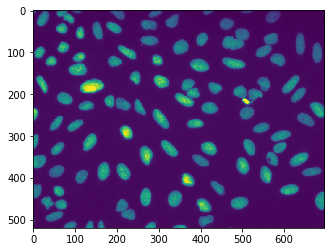

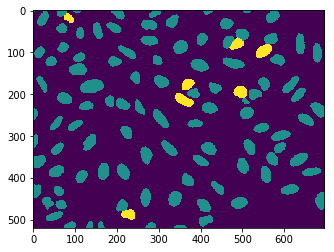

In [2]:
img_path = '/home/jr0th/github/segmentation/data/BBBC022_hand_200/images_normalized_8bit/IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.png'
ann_path = '/home/jr0th/github/segmentation/data/BBBC022_hand_200/raw_annotations/IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.png'

img = skimage.io.imread(img_path)
plt.imshow(img)
plt.show()

ann = skimage.io.imread(ann_path)[:,:,0]
plt.imshow(ann)
plt.show()


In [3]:
# get images
dim1 = img.shape[0]
dim2 = img.shape[1]

img = img.reshape((1, dim1, dim2, 1)) / 255

# build model and load weights
model = helper.model_builder.get_model_3_class(dim1, dim2)

/home/jr0th/github/segmentation/code/helper/model_builder.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/jr0th/github/segmentation/code/helper/model_builder.py:27: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:33: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/mode

In [4]:

# use latest checkpoint
weights_path = '/home/jr0th/github/segmentation/checkpoints/3class_2/checkpoint_0001.hdf5'
model.load_weights(weights_path)

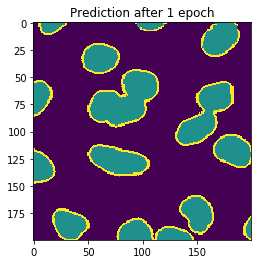

In [5]:
pred = model.predict(img).squeeze()

plt.figure()
plt.imshow(np.argmax(pred[0:200,400:600], axis = 2))
plt.title('Prediction after 1 epoch')
plt.savefig('vis_merge_merge.eps', format='eps')

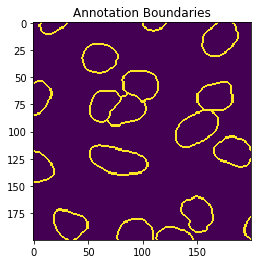

In [6]:
ann_patch = ann[0:200,400:600]
ann_patch = skimage.morphology.label(ann_patch)
ann_boundaries = skimage.segmentation.find_boundaries(ann_patch)
plt.figure()
plt.title('Annotation Boundaries')
plt.imshow(ann_boundaries)
plt.savefig('vis_merge_annot_boundaries.eps', format='eps')

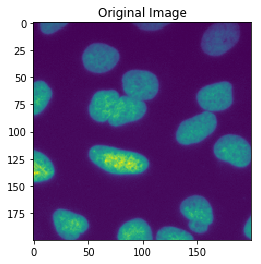

In [7]:
plt.imshow(img.squeeze()[0:200,400:600])
plt.title('Original Image')
plt.savefig('vis_merge_img.eps')